In [1]:
using Revise, Sqra
using Plots
Plots.gr(fmt=:png)

Plots.GRBackend()

In [88]:
e = Experiment(Setup(sim=Simulation(seed=1), level=8));
es = [e];

Committor residual mean: 1.5427443890981225e-7


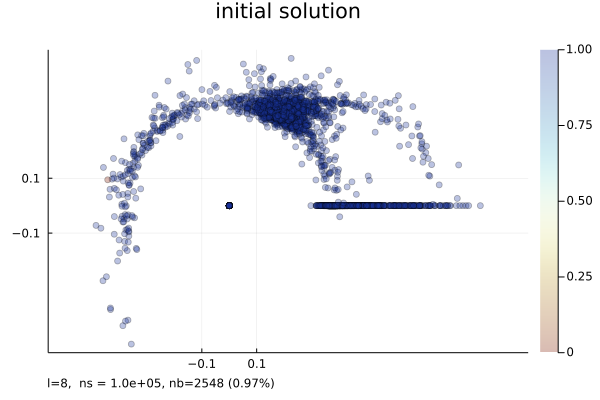

In [89]:
Sqra.plot(es[1], select=:all, triangles=false)
title!("initial solution")

In [95]:
upto = 1e8
ee = es[end]
for i =1:100
	ee.sim.nsteps > upto && break
	@time ee=Sqra.extend(ee, ee.sim.nsteps)
	push!(es, ee)
	yield()
end
es[end].sim.nsteps

Euler Maruyama simulation100%|██████████████████████████| Time: 0:00:24


Committor residual mean: 7.281666696019716e-7
 45.689428 seconds (185.70 M allocations: 29.098 GiB, 13.00% gc time)


Euler Maruyama simulation100%|██████████████████████████| Time: 0:00:49


Committor residual mean: 6.331542443285684e-7
104.087840 seconds (370.28 M allocations: 55.348 GiB, 11.02% gc time)


Euler Maruyama simulation100%|██████████████████████████| Time: 0:01:38


Committor residual mean: 6.633492146521284e-7
189.088800 seconds (739.05 M allocations: 106.569 GiB, 11.37% gc time)


102400000

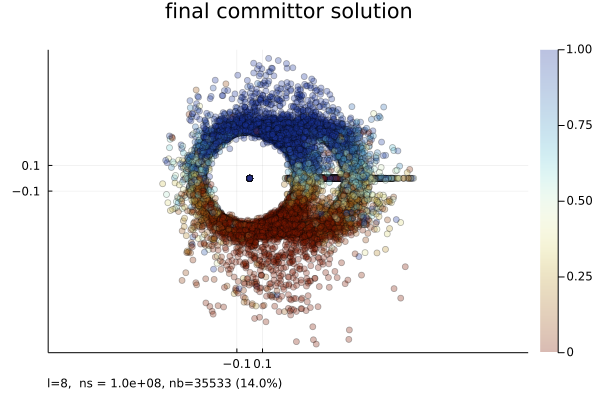

In [96]:
e = es[end]
plot(e, title="final committor solution")

In [97]:
println("number of conformation changes")
length(Sqra.changepoints(Sqra.classify(es[end].sim.x[:,1:100:end])))

number of conformation changes


2147

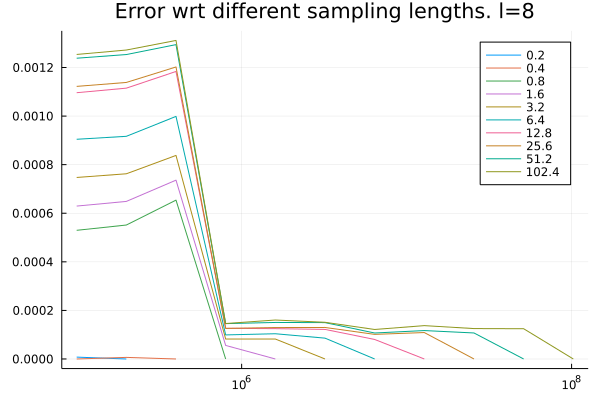

In [98]:
plot()
title!("Error wrt different sampling lengths. l=$(e.sb.ncells)")
for i=2:length(es)
	xs = [e.sim.nsteps for e in es[1:i]]
	er = Sqra.errors(es[1:i])
	plot!(xs, Sqra.errors(es[1:i]), label=es[i].sim.nsteps / 1_000_000)
end
plot!(xaxis=:log, legend=:topright)

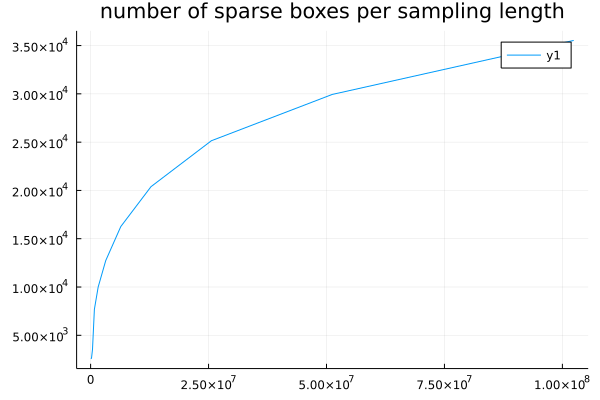

In [99]:

plot([e.sim.nsteps for e in es], [length(e.sb.inds) for e in es])
title!("number of sparse boxes per sampling length")
#xaxis!(:log); yaxis!(:log)

In [87]:
3^6

729